In [42]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

#### 1. State

In [43]:
class batsmanState(TypedDict):
  runs:int
  balls:int
  fours:int
  sixes:int

  strikeRate:float
  runsInBoundaryPer:float
  ballsPerBoundary:float
  summary:str


Function that have state output

In [44]:
def strikeRate(state:batsmanState)->batsmanState:

  strikeRate = (state['runs'] / state['balls']) * 100 if state['balls'] > 0 else 0
  
  return {'strikeRate': strikeRate}

In [45]:
def runsInBoundaryPer(state:batsmanState)->batsmanState:

  runsInBoundary = (state['fours'] * 4) + (state['sixes'] * 6)
  runsInBoundaryPer = (runsInBoundary / state['runs'] * 100) if state['runs'] > 0 else 0

  return {'runsInBoundaryPer':runsInBoundaryPer}

In [46]:
def ballsPerBoundary(state:batsmanState)->batsmanState:

  boundaries = state['fours'] + state['sixes']
  ballsPerBoundary = (state['balls'] / boundaries) if boundaries > 0 else float('inf')

  return {'ballsPerBoundary':ballsPerBoundary}

In [47]:
def summary(state:batsmanState)->batsmanState:
  
  summary = f"""
Strike rate - {state['strikeRate']}
Run's in Boundary Percenage - {state['runsInBoundaryPer']}
Ball Per Boundary - {state['ballsPerBoundary']}
"""
  
  return {'summary':summary}

#### 2. Graph

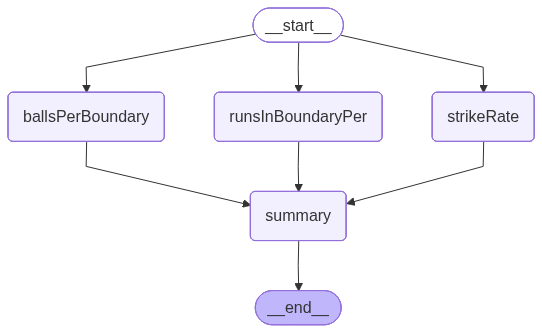

In [48]:
graph = StateGraph(batsmanState)

graph.add_node('strikeRate', strikeRate)
graph.add_node('runsInBoundaryPer', runsInBoundaryPer)
graph.add_node('ballsPerBoundary', ballsPerBoundary)
graph.add_node('summary', summary)

graph.add_edge(START, 'strikeRate')
graph.add_edge(START, 'runsInBoundaryPer')
graph.add_edge(START, 'ballsPerBoundary')

graph.add_edge('strikeRate', 'summary')
graph.add_edge('runsInBoundaryPer', 'summary')
graph.add_edge('ballsPerBoundary', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()
workflow

#### Result

In [49]:
initalState = {
  'runs': 100,
  'balls': 50,
  'fours': 6,
  'sixes': 4
}

workflow.invoke(initalState)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strikeRate': 200.0,
 'runsInBoundaryPer': 48.0,
 'ballsPerBoundary': 5.0,
 'summary': "\nStrike rate - 200.0\nRun's in Boundary Percenage - 48.0\nBall Per Boundary - 5.0\n"}